In [158]:
#Libs in this project
import requests as r
import datetime as dt
import csv
from PIL import Image
from IPython.display import display

In [159]:
#Definition of the api settings (Brazil)
url = 'https://api.covid19api.com/dayone/country/brazil'
resp = r.get(url)
resp.status_code

200

In [160]:
#Getting the json file and visualization of an example of data
raw_data = resp.json()
raw_data[0]

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

In [161]:
#Useful data of the raw_data
data = []
for obs in raw_data:
    data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

#Head of the dataset
data[:5]


[[1, 0, 0, 1, '2020-02-26T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-27T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-28T00:00:00Z'],
 [2, 0, 0, 2, '2020-02-29T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-01T00:00:00Z']]

**We can see that now we have a list of lists with the attributes:**
*Confirmed*: Number of people after testing positive for Covid 19
*Deaths*: Number of people who didn't survived the disease 
*Recovered*: Number of people who survived the disease
*Date*: Date of the observation

In [162]:
#Creating the header of the dataset:
#Make sure that you will only execute this cell once
data.insert(0, ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Date']) 
data

[['Confirmed', 'Deaths', 'Recovered', 'Active', 'Date'],
 [1, 0, 0, 1, '2020-02-26T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-27T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-28T00:00:00Z'],
 [2, 0, 0, 2, '2020-02-29T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-01T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-02T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-03T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-04T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-05T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-06T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-07T00:00:00Z'],
 [20, 0, 0, 20, '2020-03-08T00:00:00Z'],
 [25, 0, 0, 25, '2020-03-09T00:00:00Z'],
 [31, 0, 0, 31, '2020-03-10T00:00:00Z'],
 [38, 0, 0, 38, '2020-03-11T00:00:00Z'],
 [52, 0, 0, 52, '2020-03-12T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-13T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-14T00:00:00Z'],
 [162, 0, 0, 162, '2020-03-15T00:00:00Z'],
 [200, 0, 1, 199, '2020-03-16T00:00:00Z'],
 [321, 1, 2, 318, '2020-03-17T00:00:00Z'],
 [372, 3, 2, 367, '2020-03-18T00:00:00Z'],
 [621, 6, 2, 613, '2020-03-19T00:00:00Z'],
 [79

In [163]:
#Fixing the date (index = 4) as date:
for i in range(1, len(data)):
    data[i][4] = data[i][4][:10]
data[:5]


[['Confirmed', 'Deaths', 'Recovered', 'Active', 'Date'],
 [1, 0, 0, 1, '2020-02-26'],
 [1, 0, 0, 1, '2020-02-27'],
 [1, 0, 0, 1, '2020-02-28'],
 [2, 0, 0, 2, '2020-02-29']]

In [164]:
#Creating a csv file to save the dataset:
with open('brasil-covid.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(data)

In [165]:
#Converting the date (str) to date 
for i in range(1, len(data)):
    data[i][4] = dt.datetime.strptime(data[i][4], '%Y-%m-%d')
data[:5]

[['Confirmed', 'Deaths', 'Recovered', 'Active', 'Date'],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 27, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 28, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 2, 29, 0, 0)]]

In [166]:
def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'date': y[i]
            })
        return datasets
    else:
        return [{
            'label': labels[0],
            'date': y
            }]


In [167]:
def set_title(title=''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return {
        'title': title,
        'display': display
    }

In [168]:
def create_chart(x, y, labels, kind='bar', title=''):
    datasets = get_datasets(y, labels)
    options = set_title(title)
    
    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options': options
    }
    return chart

In [169]:
def get_api_chart(chart):
    url_api = 'https://quickchart.io/chart'
    response = r.get(f'{url_api}?c={str(chart)}')
    return response.content

In [170]:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [171]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

In [172]:
data[0][2]

'Recovered'

In [205]:
#Set the y values. 0 for the index of confirmed and 2 for recovered. For a better visualization, the data have been sliced over a week (7 days): 

y_confirmed = []
for obs in data[1::7]:
    y_confirmed.append(obs[0])

y_recovered = []
for obs in data[1::7]:
    y_recovered.append(obs[2])

labels = ['Confirmed', 'Recovered']

x = []
for obs in data[1::7]:
    x.append(obs[4].strftime('%d/%m/%Y'))

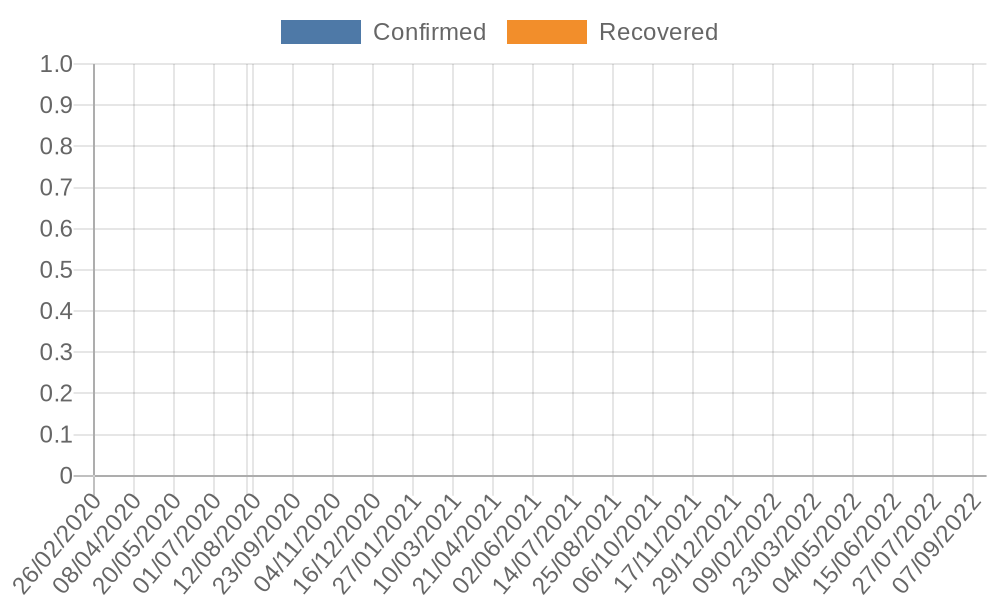

In [206]:
chart = create_chart(x, [y_confirmed, y_recovered], labels, title = 'Graphic of confirmed x recovered patient of Covid 19')
chart_content = get_api_chart(chart)
save_image('graphic-confirmed-recovered.png', chart_content)
display_image('graphic-confirmed-recovered.png')


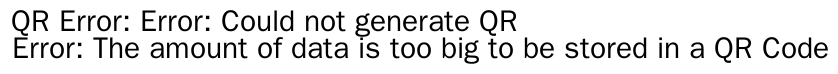

In [207]:
#QR code

from urllib.parse import quote

def get_api_qrcode(link):
    text = quote(link)
    url = 'https://quickchart.io/qr'
    resp = r.get(f'{url}?text={text}')
    return resp.content

url = 'https://quickchart.io/chart'
link = f'{url}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')